<a href="https://colab.research.google.com/github/adaedozie/Beyond-Diagnosis/blob/main/Beyond_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries

In [ ]:
!pip install umap-learn
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=f562369d36c6a8d8684eec4d1ea5c5ba74771ed1ab317611a1349f3323a354b6
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from minisom import MiniSom
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import umap
import warnings

## Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel("/content/drive/MyDrive/used_PROJECT_DATANEW_1.xlsx")

Mounted at /content/drive


## Exploratory Data Analysis

In [ ]:
data.head()

,YEAR,AGE,SEX,OCCUP,MAR_STA,DUR_EPIS,P_PSY_HX,P_MED_HX,FAM_P_HX,P_SOC_HX,...,INT_GFK,INT_S_A_D,INT_CAL,INT_PROV,JUDGMT,INSIGHT,PSE,EEG,DIAGN,CLASS
0,2017,26,F,NURSE,WIDOW,0.5,RAPE,DIABETES,NO,YES,...,NaN,NaN,NaN,NaN,NaN,PARTIAL,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ
1,2016,28,F,UNEMPLOYED,MARRIED,48,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POOR,POOR,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ
2,2016,26,M,UNEMPLOYED,SINGLE,1,NO,SHORT-SIGHT,NO,NO,...,NaN,NaN,NaN,NaN,POOR,PARTIAL,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ
3,2016,20,M,STUDENT,SINGLE,2,NaN,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ
4,2016,34,F,UNEMPLOYED,SINGLE,6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,POOR,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        664 non-null    int64 
 1   AGE         664 non-null    int64 
 2   SEX         664 non-null    object
 3   OCCUP       654 non-null    object
 4   MAR_STA     659 non-null    object
 5   DUR_EPIS    655 non-null    object
 6   P_PSY_HX    642 non-null    object
 7   P_MED_HX    630 non-null    object
 8   FAM_P_HX    639 non-null    object
 9   P_SOC_HX    644 non-null    object
 10  P_SEX_HX    620 non-null    object
 11  FOR_HX      637 non-null    object
 12  PREMOBD_HX  623 non-null    object
 13  MSE         658 non-null    object
 14  SPEECH      643 non-null    object
 15  MOOD        594 non-null    object
 16  AFFECT      604 non-null    object
 17  TH_FORM     490 non-null    object
 18  TH_STRM     476 non-null    object
 19  TH_CONTENT  464 non-null    object
 20  TH_POSS   

### Data Dictionary

1. YEAR – Year the data was recorded.


2. AGE – Age of the individual.


3. SEX – Gender of the individual.


4. OCCUP – Occupation.


5. MAR_STA – Marital status.


6. DUR_EPIS – Duration of the episode (likely related to a psychiatric or medical condition).


7. P_PSY_HX – Personal psychiatric history.


8. P_MED_HX – Personal medical history.


9. FAM_P_HX – Family psychiatric history.


10. P_SOC_HX – Personal social history.


11. P_SEX_HX – Personal sexual history.


12. FOR_HX – Forensic history (e.g., legal/criminal background).


13. PREMOBD_HX – Premorbid history (functioning before the illness).


14. MSE – Mental State Examination summary.


15. SPEECH – Observations about speech (e.g., rate, volume).


16. MOOD – Subjective emotional state.


17. AFFECT – Observable emotional expression.


18. TH_FORM – Thought form (e.g., coherence, flow).


19. TH_STRM – Thought stream (speed and quantity of thought).


20. TH_CONTENT – Content of thoughts (e.g., delusions).


21. TH_POSS – Thought possession (e.g., thought insertion).


22. PERCEP – Perception abnormalities (e.g., hallucinations).


23. ORIENT – Orientation to time, place, person.


24. ATTEN – Attention.


25. CONC – Concentration.


26. MEM_IR – Immediate recall memory.


27. MEM_ST – Short-term memory.


28. MEM_LT – Long-term memory.


29. INT_GFK – General fund of knowledge/intelligence.


30. INT_S_A_D – Social awareness and decision-making.


31. INT_CAL – Calculations/intellectual ability.


32. INT_PROV – Proverbs (interpreting abstract ideas).


33. JUDGMT – Judgment.


34. INSIGHT – Insight into one’s condition.


35. PSE – Psychiatric symptom evaluation (possibly checklist-based).


36. EEG – Electroencephalogram results or status.


37. DIAGN – Diagnosis.


38. CLASS – Classification of the diagnosis (e.g., ICD or DSM category).


### Checking For Missing values

In [ ]:
data.isnull().sum()

,0
YEAR,0
AGE,0
SEX,0
OCCUP,10
MAR_STA,5
DUR_EPIS,9
P_PSY_HX,22
P_MED_HX,34
FAM_P_HX,25
P_SOC_HX,20


### Percentage Of Missingness In Data

In [ ]:
# check for percentage of null values per column
data.isnull().sum()/len(data)*100

,0
YEAR,0.000000
AGE,0.000000
SEX,0.000000
OCCUP,1.506024
MAR_STA,0.753012
DUR_EPIS,1.355422
P_PSY_HX,3.313253
P_MED_HX,5.120482
FAM_P_HX,3.765060
P_SOC_HX,3.012048


### Distribution Of Sex

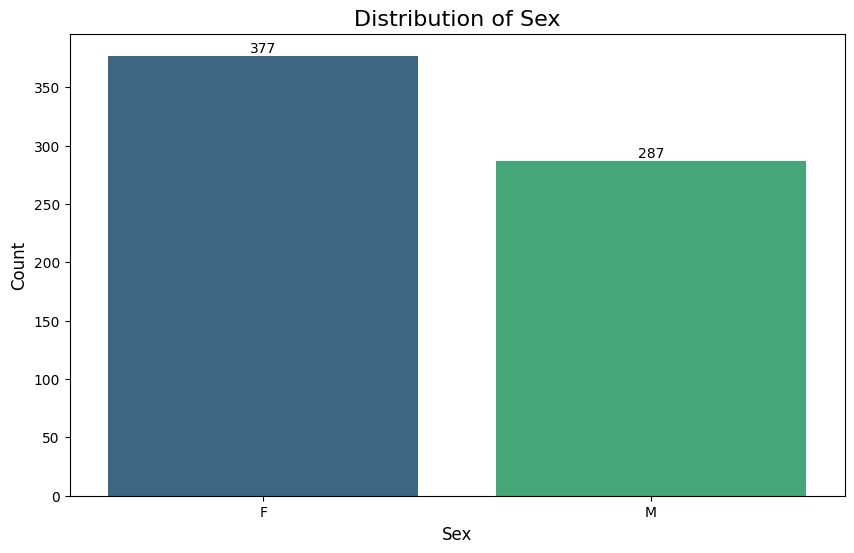

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(10,6))
ax = sns.countplot(data=data, x='SEX', palette='viridis')
plt.title('Distribution of Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Distribution Of Age

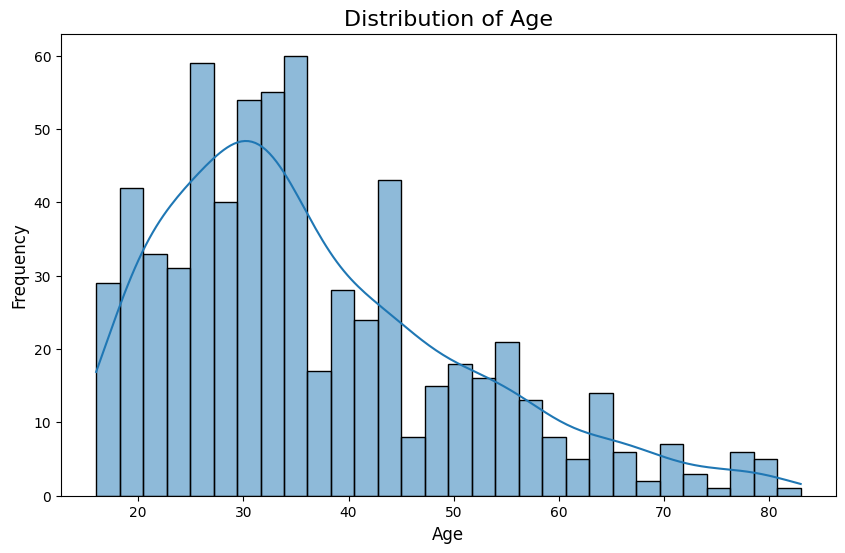

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='AGE', kde=True, bins=30)
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### OCCUPATION DISTRIBUTION

In [ ]:
# Define your mapping dictionary
occupation_mapping = {
    'NURSE': 'HEALTHCARE',
    'PHYSIOTHERAPIST': 'HEALTHCARE',
    'TEACHING': 'EDUCATION',
    'TEACHER': 'EDUCATION',
    'SCHOOL TEACHER ': 'EDUCATION',
    'SALESWOMAN': 'SALES',
    'SALESMAN': 'SALES',
    'SALES': 'SALES',
    'MECHANIC': 'TRADES',
    'ELECTRICIAN': 'TRADES',
    'CARPENTER': 'TRADES',
    'BRICKLAYER': 'TRADES',
    'BLACKSMITH': 'TRADES',
    'WELDER': 'TRADES',
    'CAPENTER': 'TRADES', # Correcting typo assumption
    'FURNITURE MAKER': 'TRADES',
    'CLEANER': 'SERVICE/MANUAL LABOR',
    'HOUSEWIFE': 'SERVICE/MANUAL LABOR',
    'CATERING': 'SERVICE/MANUAL LABOR',
    'FACTORY WORKER': 'SERVICE/MANUAL LABOR',
    'ENGINEER': 'TECHNICAL/PROFESSIONAL',
    'ARCHITECT': 'TECHNICAL/PROFESSIONAL',
    'SURVEYOR': 'TECHNICAL/PROFESSIONAL',
    'PRINTING ': 'TECHNICAL/PROFESSIONAL',
    'LAWYER': 'ADMINISTRATION/OFFICE',
    'AUDITOR': 'ADMINISTRATION/OFFICE',
    'MARKETER': 'ADMINISTRATION/OFFICE',
    'AGENT': 'ADMINISTRATION/OFFICE',
    'CIVIL': 'ADMINISTRATION/OFFICE', # Assuming 'CIVIL' refers to Civil Servant
    'PUBLIC SERVANT': 'ADMINISTRATION/OFFICE',
    'GUARD': 'SECURITY/MILITARY',
    'SECURITY': 'SECURITY/MILITARY',
    'POLICE': 'SECURITY/MILITARY',
    'NAVAL OFFICER': 'SECURITY/MILITARY',
    'STUDENT': 'STUDENT/TRAINEE',
    'GRADUATE': 'STUDENT/TRAINEE',
    'APPRENTICE': 'STUDENT/TRAINEE',
    'APPLICANT': 'STUDENT/TRAINEE',
    'UNEMPLOYED': 'UNEMPLOYED',
    'RETIRED': 'RETIRED',
    'TRADER': 'BUSINESS', # Grouping some individual categories into broader ones
    'WRITER': 'OTHER PROFESSIONAL',
    'COBBLER': 'TRADES', # Could also be 'SERVICE/MANUAL LABOR' depending on context
    'TAILOR': 'TRADES',
    'CLERGY': 'OTHER PROFESSIONAL',
    'HAIRDRESSER': 'SERVICE/MANUAL LABOR',
    'CORP MEMBER': 'OTHER',
    'BUSINESS': 'BUSINESS',
    'CRAFTSMAN': 'TRADES',
    'FARMER': 'AGRICULTURE',
    'PROSTITUTE': 'SEX WORKER', # Sensitive category, might need careful handling or exclusion
    'FASHION DESIGNER': 'OTHER PROFESSIONAL',
    'SEA MISTRESS': 'OTHER', # Unclear category, placing in 'OTHER'
}

# Apply the mapping to the 'OCCUP' column
data['OCCUP_GROUPED'] = data['OCCUP'].replace(occupation_mapping)

# You can check the new unique values in the grouped column
print(data['OCCUP_GROUPED'].unique())

# You can also check the value counts of the new grouped column
print(data['OCCUP_GROUPED'].value_counts())

['HEALTHCARE' 'UNEMPLOYED' 'STUDENT/TRAINEE' 'SERVICE/MANUAL LABOR'
 'OTHER' 'EDUCATION' nan 'SALES' 'BUSINESS' 'TECHNICAL/PROFESSIONAL'
 'SECURITY/MILITARY' 'ASSISTANT' 'RETIRED' 'OTHER PROFESSIONAL' 'TRADES'
 'ADMINISTRATION/OFFICE' 'AGRICULTURE' 'SEX WORKER' 'EMPLOYED ' 'DRIVER']
OCCUP_GROUPED
UNEMPLOYED                201
STUDENT/TRAINEE           135
BUSINESS                  116
TRADES                     34
RETIRED                    30
SECURITY/MILITARY          26
EDUCATION                  19
ADMINISTRATION/OFFICE      17
TECHNICAL/PROFESSIONAL     14
SALES                      14
SERVICE/MANUAL LABOR       13
HEALTHCARE                  7
OTHER PROFESSIONAL          6
AGRICULTURE                 6
OTHER                       5
EMPLOYED                    5
ASSISTANT                   3
SEX WORKER                  2
DRIVER                      1
Name: count, dtype: int64


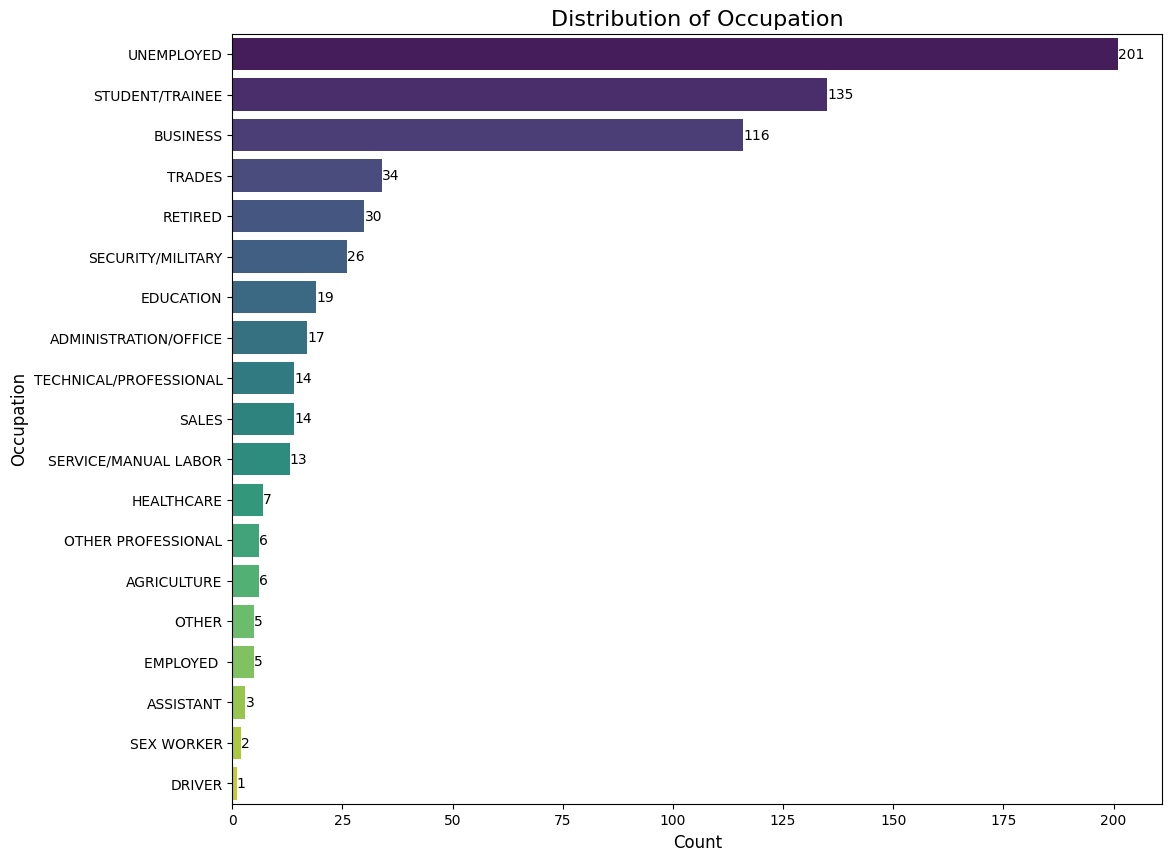

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(data=data, y='OCCUP_GROUPED', order=data['OCCUP_GROUPED'].value_counts().index, palette='viridis')
plt.title('Distribution of Occupation', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Occupation', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Distribution Of CLASS AND DIAGNOSIS

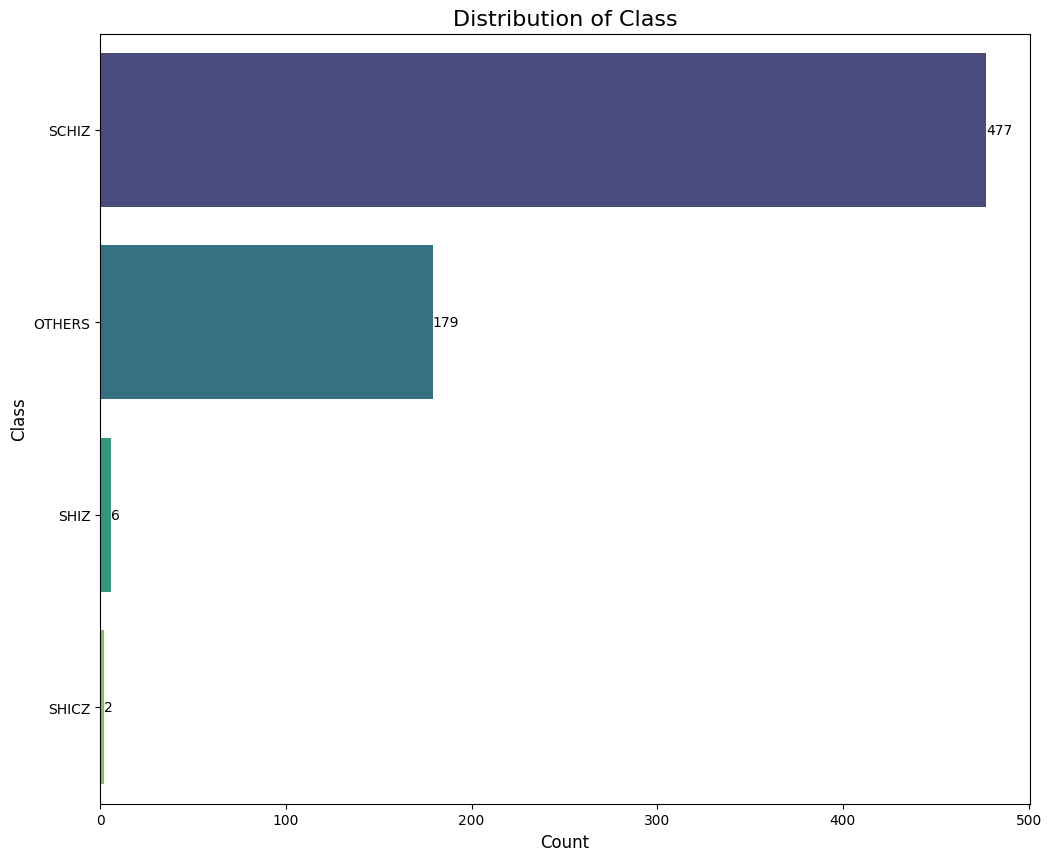

In [ ]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(data=data, y='CLASS', order=data['CLASS'].value_counts().index, palette='viridis')
plt.title('Distribution of Class', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Class', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

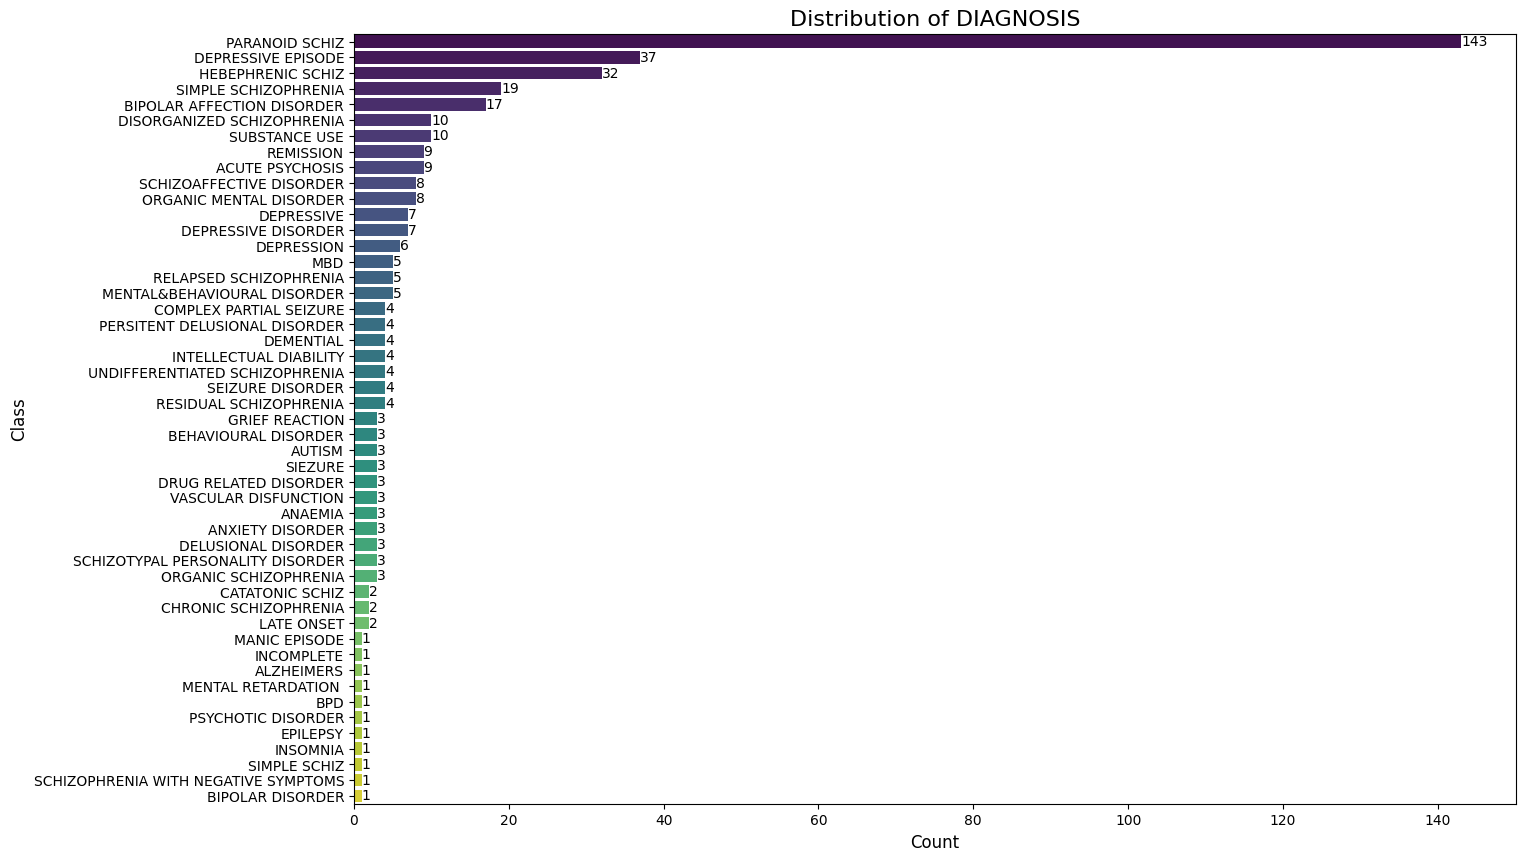

In [ ]:

plt.figure(figsize=(15, 10))
ax = sns.countplot(data=data, y='DIAGN', order=data['DIAGN'].value_counts().index, palette='viridis')
plt.title('Distribution of DIAGNOSIS', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Class', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Distribution Of The Duration Of Episode

In [ ]:
data['DUR_EPIS'] = pd.to_numeric(data['DUR_EPIS'], errors='coerce')

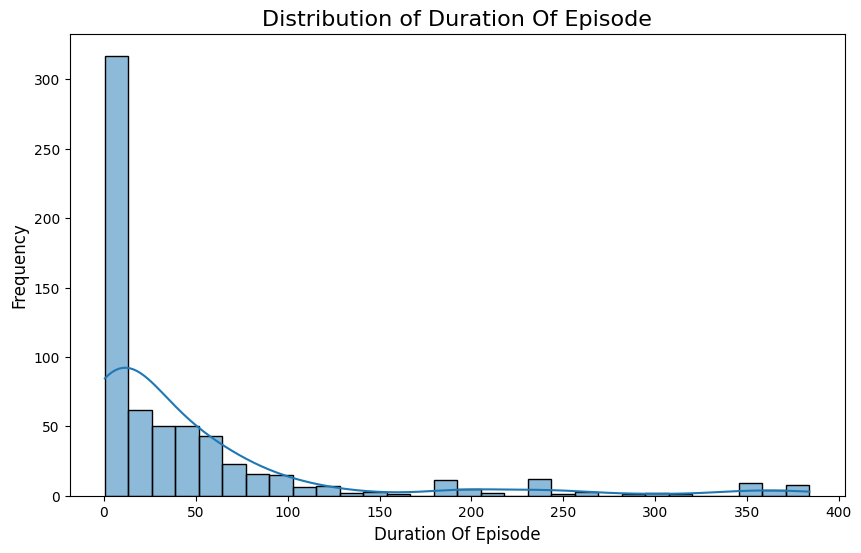

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='DUR_EPIS', kde=True)
plt.title('Distribution of Duration Of Episode', fontsize=16)
plt.xlabel('Duration Of Episode', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## CLEANING OF DATA

In [ ]:
history_cols = [
    'P_PSY_HX', 'P_MED_HX', 'FAM_P_HX', 'P_SOC_HX', 'P_SEX_HX'
]

In [ ]:
def clean_whitespace(df):
  """
  Strips leading and trailing whitespace from object type columns in a DataFrame.

  Args:
    df: The input pandas DataFrame.

  Returns:
    A new DataFrame with whitespace stripped from object columns.
  """
  df_cleaned = df.copy()
  for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].str.strip()
  return df_cleaned

data_cleaned = clean_whitespace(data)
data_cleaned.head()

,YEAR,AGE,SEX,OCCUP,MAR_STA,DUR_EPIS,P_PSY_HX,P_MED_HX,FAM_P_HX,P_SOC_HX,...,INT_S_A_D,INT_CAL,INT_PROV,JUDGMT,INSIGHT,PSE,EEG,DIAGN,CLASS,OCCUP_GROUPED
0,2017,26,F,NURSE,WIDOW,0.5,RAPE,DIABETES,NO,YES,...,NaN,NaN,NaN,NaN,PARTIAL,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ,HEALTHCARE
1,2016,28,F,UNEMPLOYED,MARRIED,48.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,POOR,POOR,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ,UNEMPLOYED
2,2016,26,M,UNEMPLOYED,SINGLE,1.0,NO,SHORT-SIGHT,NO,NO,...,NaN,NaN,NaN,POOR,PARTIAL,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ,UNEMPLOYED
3,2016,20,M,STUDENT,SINGLE,2.0,NaN,NaN,NaN,YES,...,NaN,NaN,NaN,NaN,NaN,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ,STUDENT/TRAINEE
4,2016,34,F,UNEMPLOYED,SINGLE,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,POOR,GOOD,NORMAL,PARANOID SCHIZ,SCHIZ,UNEMPLOYED


In [ ]:
data_cleaned['INSIGHT'] = data_cleaned['INSIGHT'].replace({
    'G': 'GOOD',
    ' LA': 'LACKING',
    'LA': 'LACKING',
    'LACKIN': 'LACKING'
})

data_cleaned['INSIGHT'] = data_cleaned['INSIGHT'].str.strip()
print(data_cleaned['INSIGHT'].unique())

['PARTIAL' 'POOR' nan 'PERSISTENT' 'GOOD' 'FAIR' 'LACKING' 'IMPAIRED']


In [ ]:
for col in history_cols:
    data_cleaned[col] = data_cleaned[col].replace('N', 'NO')

for col in history_cols:
    print(f"Unique values in {col} after replacement: {data_cleaned[col].unique()}")

Unique values in P_PSY_HX after replacement: ['RAPE' nan 'NO' 'SUSPISION' 'MENTAL ILLNESS' 'IRRITABILITY' 'GRIEF' 'YES'
 'NOT KNOWN']
Unique values in P_MED_HX after replacement: ['DIABETES' nan 'SHORT-SIGHT' 'NO' 'SIEZURE' 'MALARIA' 'HADE' 'SHADE'
 'BLOOD TRANS' 'ALLEGIES' 'HbSS' 'STROKE' 'HDASP' 'IMMUNE DISORDER'
 'ASPHYXIA' 'JAUNDICE' 'GLAUCOMA' 'ASTHMA' 'HYPTENSIVE' 'YES' 'HIV']
Unique values in FAM_P_HX after replacement: ['NO' nan 'YES' 'NOT KNOWN' 'COULD NOT BE ACCESSED']
Unique values in P_SOC_HX after replacement: ['YES' nan 'NO' 'NO KNOWN']
Unique values in P_SEX_HX after replacement: ['NORMAL' nan 'MASTURBATE' 'GORNORREA' 'RAPE' 'NOT KNOWN' 'NO' 'SEDATED']


In [ ]:
for col in data_cleaned.columns:
    if data_cleaned[col].dtype == 'object':
        unique_count = data_cleaned[col].nunique()
        print(f"Column '{col}': {unique_count} unique values")
        print("\n" + "="*30 + "\n") # Separator for clarity

Column 'SEX': 2 unique values


Column 'OCCUP': 56 unique values


Column 'MAR_STA': 8 unique values


Column 'P_PSY_HX': 8 unique values


Column 'P_MED_HX': 20 unique values


Column 'FAM_P_HX': 4 unique values


Column 'P_SOC_HX': 3 unique values


Column 'P_SEX_HX': 7 unique values


Column 'FOR_HX': 4 unique values


Column 'PREMOBD_HX': 6 unique values


Column 'MSE': 10 unique values


Column 'SPEECH': 16 unique values


Column 'MOOD': 35 unique values


Column 'AFFECT': 23 unique values


Column 'TH_FORM': 21 unique values


Column 'TH_STRM': 22 unique values


Column 'TH_CONTENT': 22 unique values


Column 'TH_POSS': 18 unique values


Column 'PERCEP': 26 unique values


Column 'ORIENT': 8 unique values


Column 'ATTEN': 7 unique values


Column 'CONC': 9 unique values


Column 'MEM_IR': 6 unique values


Column 'MEM_ST': 3 unique values


Column 'MEM_LT': 5 unique values


Column 'INT_GFK': 3 unique values


Column 'INT_S_A_D': 3 unique values


Column 'INT_CAL': 3 unique val

In [ ]:
data_cleaned['MOOD'].unique()

array(['NEUTRAL', 'HAPPY', 'RELAXED', 'FINE', 'OK', nan, 'WORRIED', 'SAD',
       'EUTHYMIC', 'IRRITABLE', 'INCREASED', 'PERPLEXED', 'SEDATED',
       'ANGRY', 'RESTLESS', 'hAPPY', "I'M NOT HAPPY", "I'M OK", 'NOTHING',
       'NOT ACCESSED', "I'M HAPPY", 'COULD NOT BE ASSESSED', 'DEFFERED',
       "I'M NOT ENJOYING", 'FEEL PEACE', 'I FEEL HAPPY', 'I AM NOT HAPPY',
       'NORMAL', 'I AM HAPPY', 'LET US BE THANKFUL', 'I AM FINE',
       'I AM SAD', 'I AM NORMAL', 'NOT HAPPY', 'I AM OKAY', 'I AM OK'],
      dtype=object)

### MOOD Mapping

In [ ]:
mood_mapping = {
    'HAPPY': ['HAPPY', 'hAPPY', "I'M HAPPY", 'I FEEL HAPPY', 'I AM HAPPY'],
    'SAD': ['SAD', 'I AM SAD', "I'M NOT HAPPY", 'I AM NOT HAPPY', 'NOT HAPPY', "I'M NOT ENJOYING"],
    'NEUTRAL': ['NEUTRAL', 'FINE', 'OK', "I'M OK", 'I AM FINE', 'I AM OKAY', 'I AM OK', 'NORMAL', 'I AM NORMAL'],
    'WORRIED': ['WORRIED', 'IRRITABLE', 'ANGRY', 'RESTLESS'],
    'RELAXED': ['RELAXED', 'EUTHYMIC', 'FEEL PEACE'],
    'UNKNOWN': ['NOTHING', 'NOT ACCESSED', 'COULD NOT BE ASSESSED', 'DEFFERED'],
    'OTHER': ['INCREASED', 'PERPLEXED', 'SEDATED', 'LET US BE THANKFUL']
}

In [ ]:
reversed_mapping = {}
for standardized_value, original_values in mood_mapping.items():
    for original_value in original_values:
        reversed_mapping[original_value] = standardized_value

# Apply the reversed mapping to the 'MOOD' column
data_cleaned['MOOD_CLEANED'] = data_cleaned['MOOD'].replace(reversed_mapping)

# Check the unique values in the new cleaned column
print(data_cleaned['MOOD_CLEANED'].unique())

# You can also check the value counts of the new grouped column
print(data_cleaned['MOOD_CLEANED'].value_counts())

['NEUTRAL' 'HAPPY' 'RELAXED' nan 'WORRIED' 'SAD' 'OTHER' 'UNKNOWN']
MOOD_CLEANED
HAPPY      288
NEUTRAL    152
SAD        113
RELAXED     21
WORRIED      9
OTHER        6
UNKNOWN      5
Name: count, dtype: int64


### AFFECT Mapping

In [ ]:
data_cleaned['AFFECT'].unique()

array(['DEPRESSED', 'REACTIVE', 'BLUNT', 'RESTRICTED', 'ABNORMAL',
       'IRRITABLE', 'FEARFUL', 'CONGRUENT', 'SUSPICIOUS', nan, 'FLAT',
       'DULL', 'EUTHYMIC', 'CALM', 'WEEPING', 'STERN', 'DYSPHORIC',
       'IRRETABLE', 'APPHREHENSIVE', 'NORMAL', 'SAD', 'LABILE',
       'INAPPROPRIATE', 'NAD'], dtype=object)

In [ ]:
affect_mapping = {

}

In [ ]:
data_editted = data_cleaned.dropna()

## Multivariate Analysis

### Insight Vs Judgment

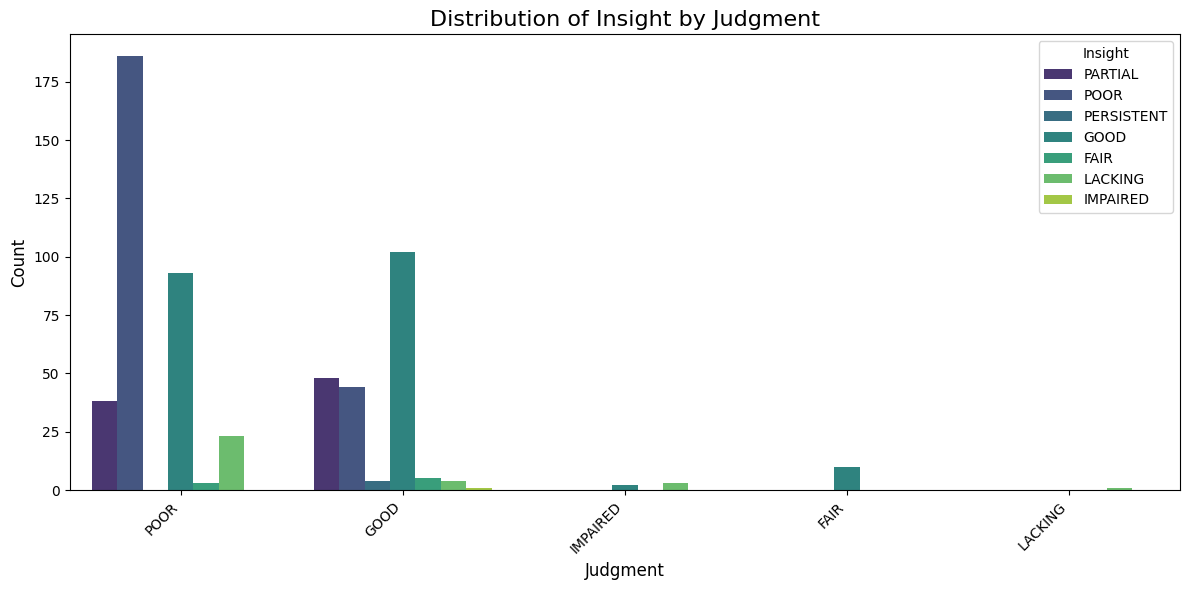

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(12, 6))
sns.countplot(data=data_cleaned, x='JUDGMT', hue='INSIGHT', palette='viridis')
plt.title('Distribution of Insight by Judgment', fontsize=16)
plt.xlabel('Judgment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Insight')
plt.tight_layout()
plt.show()

### Gender Relationship to Pschological History

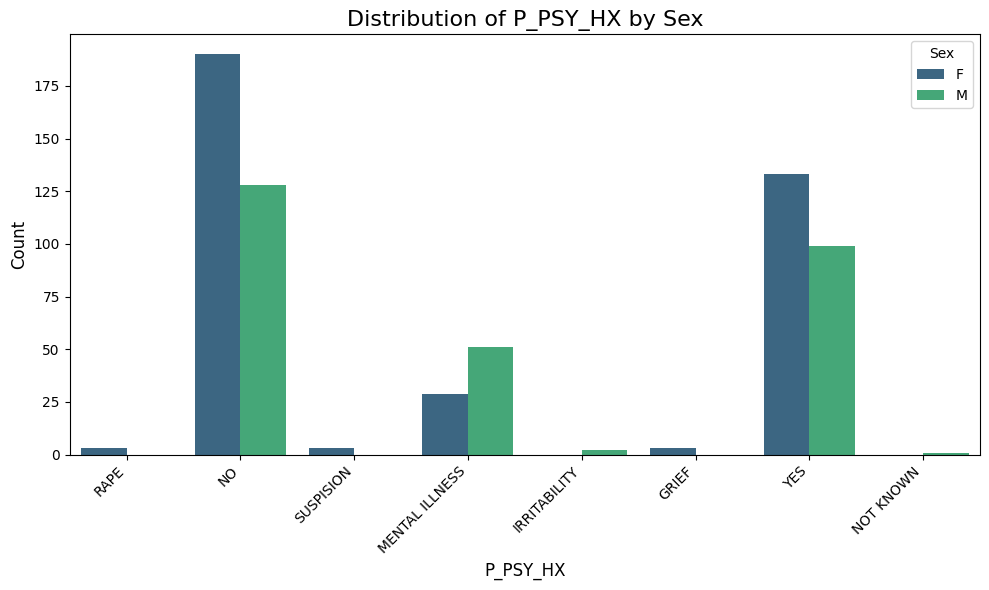

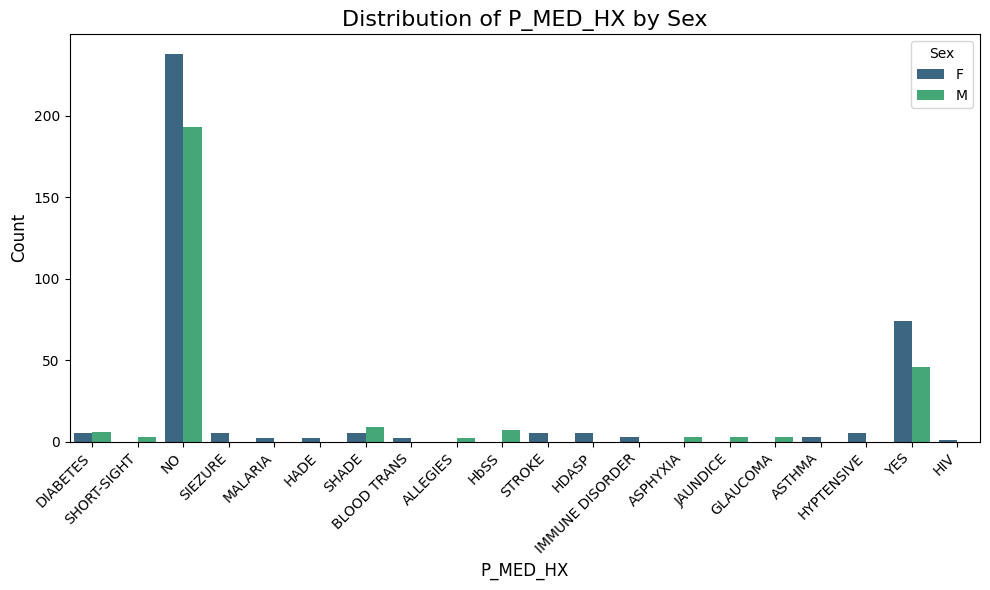

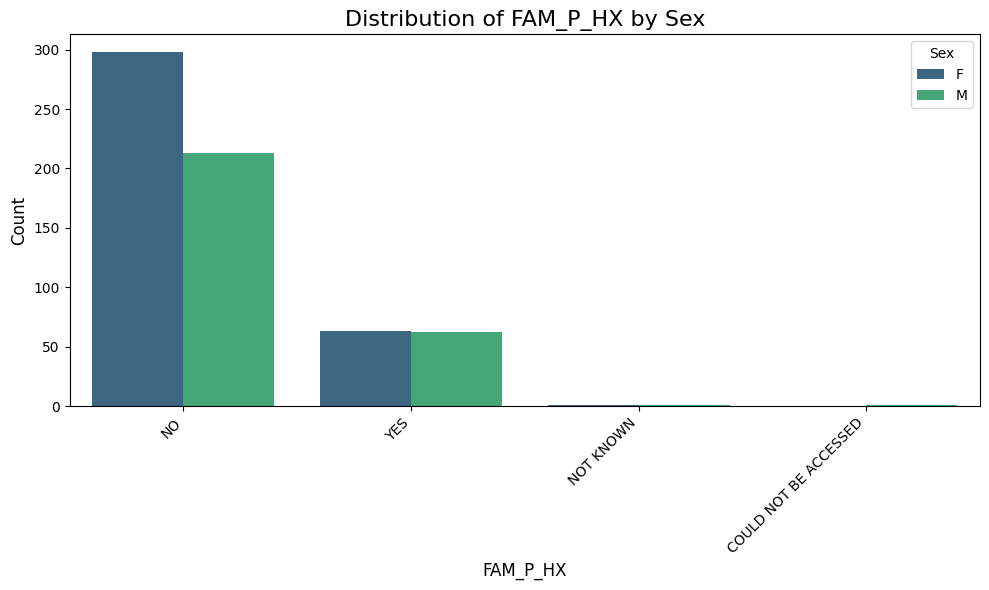

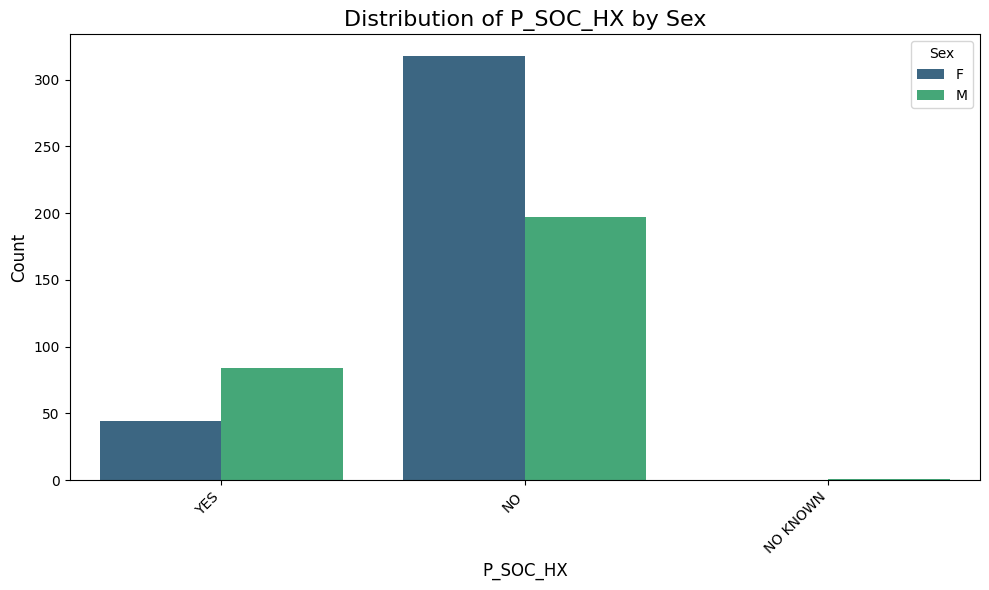

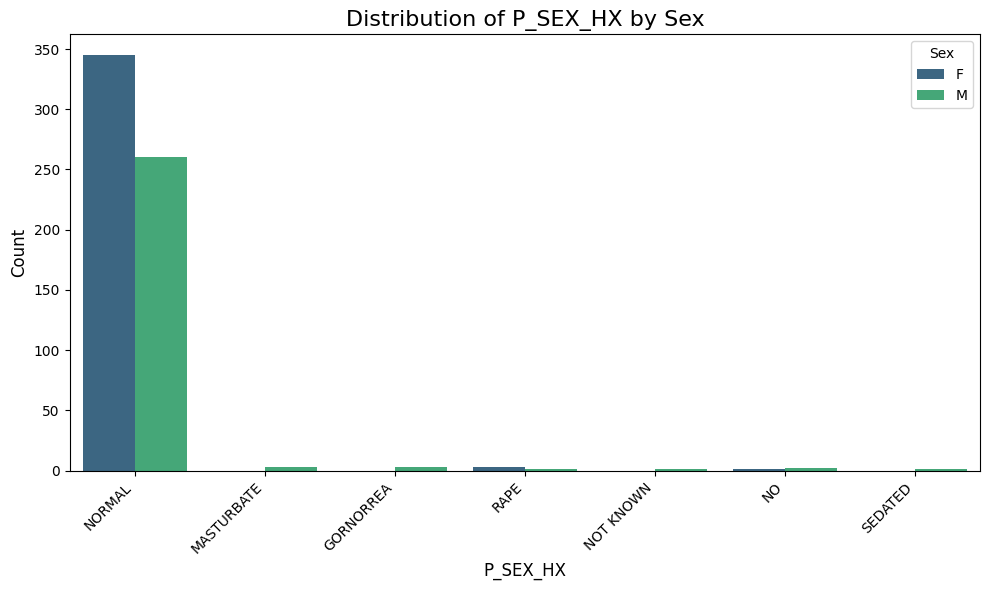

In [ ]:
history_cols = [
    'P_PSY_HX', 'P_MED_HX', 'FAM_P_HX', 'P_SOC_HX', 'P_SEX_HX'
]

for col in history_cols:
    plt.figure(figsize=(10, 6)) # Adjust figure size as needed
    sns.countplot(data=data_cleaned, x=col, hue='SEX', palette='viridis')
    plt.title(f'Distribution of {col} by Sex', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(title='Sex')
    plt.tight_layout()
    plt.show()

In [ ]:
history_cols = [
    'P_PSY_HX', 'P_MED_HX', 'FAM_P_HX', 'P_SOC_HX', 'P_SEX_HX'
]

for col in history_cols:
    # Group by the history column and SEX, and count the occurrences
    history_sex_counts = data_cleaned.groupby([col, 'SEX']).size().unstack(fill_value=0)

    # Print the table
    print(f"Table for Distribution of {col} by Sex:")
    print(history_sex_counts)
    print("\n" + "="*30 + "\n") # Separator for clarity

Table for Distribution of P_PSY_HX by Sex:
SEX               F    M
P_PSY_HX                
GRIEF             3    0
IRRITABILITY      0    2
MENTAL ILLNESS   29   51
NO              190  128
NOT KNOWN         0    1
RAPE              3    0
SUSPISION         3    0
YES             133   99


Table for Distribution of P_MED_HX by Sex:
SEX                F    M
P_MED_HX                 
ALLEGIES           0    2
ASPHYXIA           0    3
ASTHMA             3    0
BLOOD TRANS        2    0
DIABETES           5    6
GLAUCOMA           0    3
HADE               2    0
HDASP              5    0
HIV                1    0
HYPTENSIVE         5    0
HbSS               0    7
IMMUNE DISORDER    3    0
JAUNDICE           0    3
MALARIA            2    0
NO               238  193
SHADE              5    9
SHORT-SIGHT        0    3
SIEZURE            5    0
STROKE             5    0
YES               74   46


Table for Distribution of FAM_P_HX by Sex:
SEX                      F    M
FAM_P_HX     

### MOOD VS AFFECT

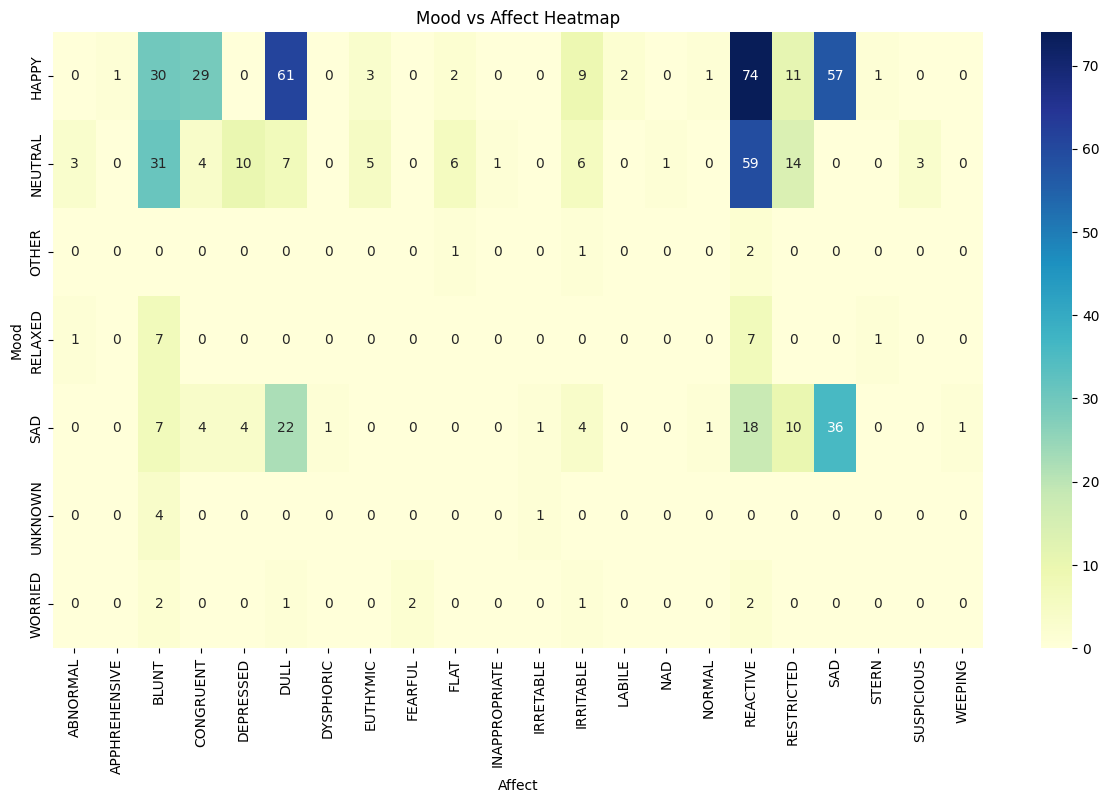

In [ ]:
ct = pd.crosstab(data_cleaned['MOOD_CLEANED'], data_cleaned['AFFECT'])
plt.figure(figsize=(15,8))
sns.heatmap(ct, annot=True, cmap='YlGnBu')
plt.title('Mood vs Affect Heatmap')
plt.xlabel('Affect')
plt.ylabel('Mood')
plt.show()

### MOOD Vs SPEECH

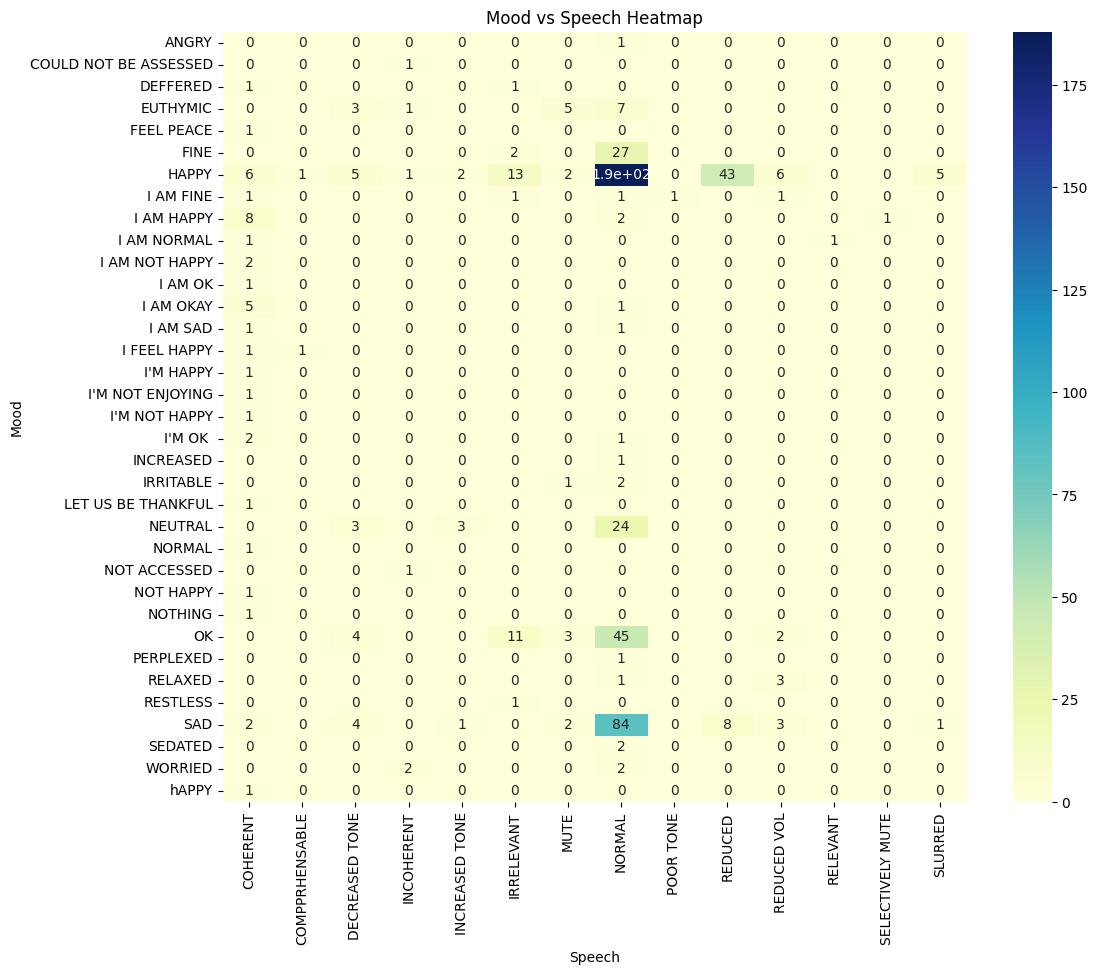

In [ ]:
ct = pd.crosstab(data['MOOD'], data['SPEECH'])
plt.figure(figsize=(12,10))
sns.heatmap(ct, annot=True, cmap='YlGnBu')
plt.title('Mood vs Speech Heatmap')
plt.xlabel('Speech')
plt.ylabel('Mood')
plt.show()

In [ ]:
cluster1_columns = ['MSE', 'MOOD', 'AFFECT', 'TH_FORM', 'TH_STRM', 'TH_CONTENT', 'PERCEP', 'INSIGHT', 'JUDGMT', 'PSE']
cluster2_columns = ['P_PSY_HX', 'P_MED_HX', 'FAM_P_HX', 'P_SOC_HX', 'P_SEX_HX', 'FOR_HX', 'PREMOBD_HX']

data_cleaned[cluster1_columns].isnull().sum()

,0
MSE,6
MOOD,70
AFFECT,60
TH_FORM,174
TH_STRM,188
TH_CONTENT,200
PERCEP,196
INSIGHT,73
JUDGMT,90
PSE,27


In [ ]:
data_cleaned[cluster2_columns].isnull().sum()

,0
P_PSY_HX,22
P_MED_HX,34
FAM_P_HX,25
P_SOC_HX,20
P_SEX_HX,44
FOR_HX,27
PREMOBD_HX,41


In [ ]:
data_cleaned.shape

(664, 40)

## Dropping And Filling Of Missing Values

In [ ]:
# Check the percentage of missing values for each column again
missing_percentages = data_cleaned.isnull().sum() / len(data_cleaned) * 100
print("Percentage of missing values per column:")
print(missing_percentages)

# Define the threshold for dropping columns
missing_threshold = 40

# Identify columns to drop
columns_to_drop = missing_percentages[missing_percentages > missing_threshold].index.tolist()

print(f"\nColumns to drop (missing more than {missing_threshold}%):")
print(columns_to_drop)

# Drop the identified columns from the DataFrame
data_cleaned_dropped = data_cleaned.drop(columns=columns_to_drop)

print("\nShape of the DataFrame after dropping columns:")
print(data_cleaned_dropped.shape)

# Verify that the columns have been dropped and check remaining missing values
print("\nRemaining missing values after dropping columns:")
print(data_cleaned_dropped.isnull().sum())

Percentage of missing values per column:
YEAR              0.000000
AGE               0.000000
SEX               0.000000
OCCUP             1.506024
MAR_STA           0.753012
DUR_EPIS          1.506024
P_PSY_HX          3.313253
P_MED_HX          5.120482
FAM_P_HX          3.765060
P_SOC_HX          3.012048
P_SEX_HX          6.626506
FOR_HX            4.066265
PREMOBD_HX        6.174699
MSE               0.903614
SPEECH            3.162651
MOOD             10.542169
AFFECT            9.036145
TH_FORM          26.204819
TH_STRM          28.313253
TH_CONTENT       30.120482
TH_POSS          57.228916
PERCEP           29.518072
ORIENT           17.319277
ATTEN            16.415663
CONC             18.072289
MEM_IR           23.343373
MEM_ST           27.259036
MEM_LT           25.753012
INT_GFK          44.728916
INT_S_A_D        48.945783
INT_CAL          50.753012
INT_PROV         51.957831
JUDGMT           13.554217
INSIGHT          10.993976
PSE               4.066265
EEG           

### CLASS Distribution By AGE

In [ ]:
data_cleaned_dropped['CLASS'] = data_cleaned_dropped['CLASS'].replace(['SHIZ', 'SHICZ'], 'SCHIZ')

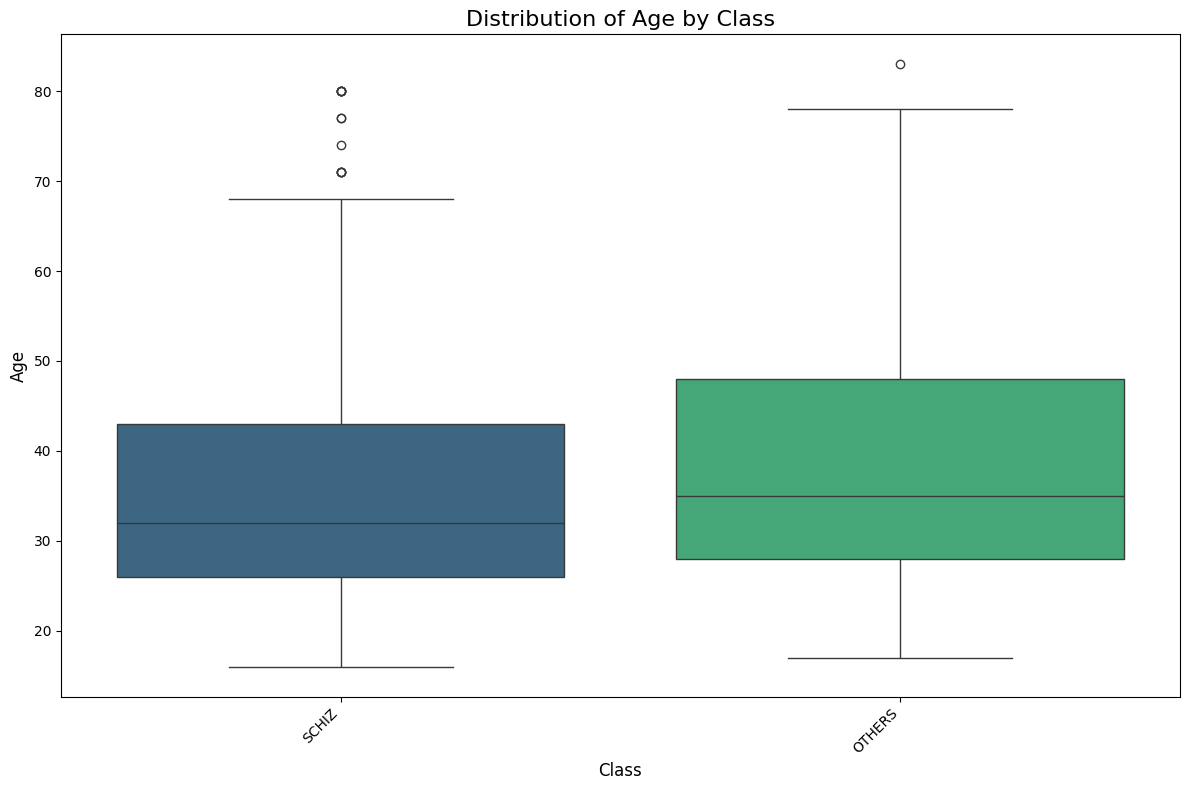

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned_dropped, x='CLASS', y='AGE', palette='viridis')
plt.title('Distribution of Age by Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels if they overlap
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Filling Of Missing Values

In [ ]:
from sklearn.impute import KNNImputer

cols_with_missing = data_cleaned_dropped.columns[data_cleaned_dropped.isnull().any()].tolist()

print("Columns with remaining missing values:")
print(cols_with_missing)

categorical_cols_to_impute = [col for col in cols_with_missing if data_cleaned_dropped[col].dtype == 'object']
numerical_cols_to_impute = [col for col in cols_with_missing if data_cleaned_dropped[col].dtype != 'object']

print("\nCategorical columns to impute:", categorical_cols_to_impute)
print("Numerical columns to impute:", numerical_cols_to_impute)

for col in categorical_cols_to_impute:
    mode_val = data_cleaned_dropped[col].mode()[0]
    data_cleaned_dropped[col] = data_cleaned_dropped[col].fillna(mode_val)

# Example of median imputation for numerical columns (if you choose this route for some):
for col in numerical_cols_to_impute:
    median_val = data_cleaned_dropped[col].median()
    data_cleaned_dropped[col] = data_cleaned_dropped[col].fillna(median_val)

# imputer = KNNImputer(n_neighbors=5)
# data_imputed_knn = imputer.fit_transform(data_numerical_encoded)
# data_imputed_knn = pd.DataFrame(data_imputed_knn, columns=data_numerical_encoded.columns)

# print("\nMissing values after KNN Imputation (if applied to numerical data):")
# print(data_imputed_knn.isnull().sum())

print("\nMissing values after chosen imputation methods:")
print(data_cleaned_dropped.isnull().sum())

Columns with remaining missing values:
['OCCUP', 'MAR_STA', 'DUR_EPIS', 'P_PSY_HX', 'P_MED_HX', 'FAM_P_HX', 'P_SOC_HX', 'P_SEX_HX', 'FOR_HX', 'PREMOBD_HX', 'MSE', 'SPEECH', 'MOOD', 'AFFECT', 'TH_FORM', 'TH_STRM', 'TH_CONTENT', 'PERCEP', 'ORIENT', 'ATTEN', 'CONC', 'MEM_IR', 'MEM_ST', 'MEM_LT', 'JUDGMT', 'INSIGHT', 'PSE', 'EEG', 'DIAGN', 'OCCUP_GROUPED', 'MOOD_CLEANED']

Categorical columns to impute: ['OCCUP', 'MAR_STA', 'P_PSY_HX', 'P_MED_HX', 'FAM_P_HX', 'P_SOC_HX', 'P_SEX_HX', 'FOR_HX', 'PREMOBD_HX', 'MSE', 'SPEECH', 'MOOD', 'AFFECT', 'TH_FORM', 'TH_STRM', 'TH_CONTENT', 'PERCEP', 'ORIENT', 'ATTEN', 'CONC', 'MEM_IR', 'MEM_ST', 'MEM_LT', 'JUDGMT', 'INSIGHT', 'PSE', 'EEG', 'DIAGN', 'OCCUP_GROUPED', 'MOOD_CLEANED']
Numerical columns to impute: ['DUR_EPIS']

Missing values after chosen imputation methods:
YEAR             0
AGE              0
SEX              0
OCCUP            0
MAR_STA          0
DUR_EPIS         0
P_PSY_HX         0
P_MED_HX         0
FAM_P_HX         0
P_SOC_HX       

## Modeling : Unsupervised Learning

In [ ]:
mental_state_cols = ['MSE', 'MOOD_CLEANED', 'AFFECT', 'TH_FORM', 'TH_STRM', 'TH_CONTENT', 'PERCEP', 'INSIGHT', 'JUDGMT', 'PSE']
history_cols = ['P_PSY_HX', 'P_MED_HX', 'FAM_P_HX', 'P_SOC_HX', 'P_SEX_HX', 'FOR_HX', 'PREMOBD_HX']


mental_state_cols = [col for col in mental_state_cols if col in data_cleaned_dropped.columns]
history_cols = [col for col in history_cols if col in data_cleaned_dropped.columns]

print("Mental State Columns for Clustering:", mental_state_cols)
print("History Columns for Clustering:", history_cols)

# --- Preprocessing Function ---
def preprocess_for_clustering(df, columns_to_process):
    """
    Handles missing values, encodes categorical, and scales numerical data
    for a given set of columns.
    """
    df_subset = df[columns_to_process].copy()

    # Identify categorical and numerical columns within the subset
    categorical_subset_cols = [col for col in columns_to_process if df_subset[col].dtype == 'object']
    numerical_subset_cols = [col for col in columns_to_process if df_subset[col].dtype != 'object']

    for col in categorical_subset_cols:
        if df_subset[col].isnull().any():
            mode_val = df_subset[col].mode()[0]
            df_subset[col] = df_subset[col].fillna(mode_val)

    for col in numerical_subset_cols:
        if df_subset[col].isnull().any():
            median_val = df_subset[col].median()
            df_subset[col] = df_subset[col].fillna(median_val)

    # Check if missing values are handled
    if df_subset.isnull().sum().sum() > 0:
        print(f"Warning: Missing values still exist after simple imputation in {columns_to_process}:")
        print(df_subset.isnull().sum())

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_subset_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_subset_cols)
        ],
        remainder='passthrough'
    )

    # Fit and transform the data
    data_processed = preprocessor.fit_transform(df_subset)

    ohe_feature_names = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_subset_cols))
    all_feature_names = numerical_subset_cols + ohe_feature_names

    return data_processed, all_feature_names, df_subset.index

Mental State Columns for Clustering: ['MSE', 'MOOD_CLEANED', 'AFFECT', 'TH_FORM', 'TH_STRM', 'TH_CONTENT', 'PERCEP', 'INSIGHT', 'JUDGMT', 'PSE']
History Columns for Clustering: ['P_PSY_HX', 'P_MED_HX', 'FAM_P_HX', 'P_SOC_HX', 'P_SEX_HX', 'FOR_HX', 'PREMOBD_HX']


### Mental State Modeling


--- Processing and Clustering Mental State Data ---
Mental State: K=2, Silhouette Score=0.1768
Mental State: K=3, Silhouette Score=0.1496
Mental State: K=4, Silhouette Score=0.1699
Mental State: K=5, Silhouette Score=0.1475
Mental State: K=6, Silhouette Score=0.1472
Mental State: K=7, Silhouette Score=0.1311
Mental State: K=8, Silhouette Score=0.1325
Mental State: K=9, Silhouette Score=0.1229
Mental State: K=10, Silhouette Score=0.1222


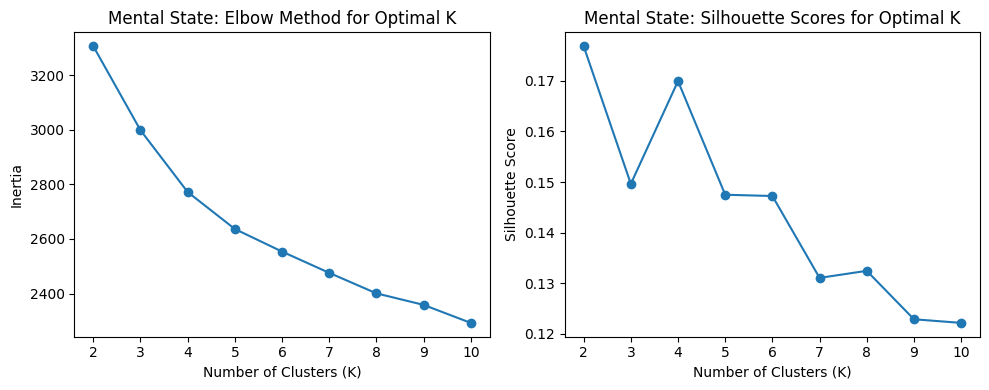


--- Analysis of Mental State Clusters (4 clusters) ---


,MSE,MOOD_CLEANED,AFFECT,TH_FORM,TH_STRM,TH_CONTENT,PERCEP,INSIGHT,JUDGMT,PSE
Mental_State_Cluster,,,,,,,,,,
0,KEMPT,HAPPY,REACTIVE,LOGICAL,NORMAL,PERSECUTORY DELUSION,AUDITORY HALLUCINATION,POOR,POOR,NORMAL
1,KEMPT,HAPPY,DULL,NORMAL,NORMAL,DELUSION,AUDITORY,GOOD,POOR,GOOD
2,KEMPT,HAPPY,REACTIVE,LOGICAL,NORMAL,PERSECUTORY DELUSION,AUDITORY HALLUCINATION,GOOD,GOOD,NORMAL
3,KEMPT,HAPPY,SAD,POOR,DELUSION,NORMAL,AUDITORY,POOR,POOR,NORMAL


In [ ]:
# --- Process and Cluster Mental State Data ---
print("\n--- Processing and Clustering Mental State Data ---")
mental_state_processed, mental_state_feature_names, mental_state_indices = preprocess_for_clustering(data_cleaned_dropped, mental_state_cols)


# Determine optimal number of clusters for Mental State using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Add n_init
    kmeans.fit(mental_state_processed)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(mental_state_processed, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Mental State: K={k}, Silhouette Score={score:.4f}")


# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Mental State: Elbow Method for Optimal K')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Mental State: Silhouette Scores for Optimal K')
plt.tight_layout()
plt.show()


optimal_k_mental = 4

kmeans_mental = KMeans(n_clusters=optimal_k_mental, random_state=42, n_init=10)
mental_state_clusters = kmeans_mental.fit_predict(mental_state_processed)


data_cleaned_dropped['Mental_State_Cluster'] = pd.Series(mental_state_clusters, index=mental_state_indices)

print(f"\n--- Analysis of Mental State Clusters ({optimal_k_mental} clusters) ---")
mental_state_analysis = data_cleaned_dropped.groupby('Mental_State_Cluster')[mental_state_cols].agg(lambda x: x.mode()[0] if x.dtype == 'object' else x.median()) # Use median for numerical, mode for categorical
mental_state_analysis

### History Modeling


--- Processing and Clustering History Data ---
History: K=2, Silhouette Score=0.2332
History: K=3, Silhouette Score=0.2674
History: K=4, Silhouette Score=0.2811
History: K=5, Silhouette Score=0.3303
History: K=6, Silhouette Score=0.3602
History: K=7, Silhouette Score=0.3635
History: K=8, Silhouette Score=0.3862
History: K=9, Silhouette Score=0.4262
History: K=10, Silhouette Score=0.4547


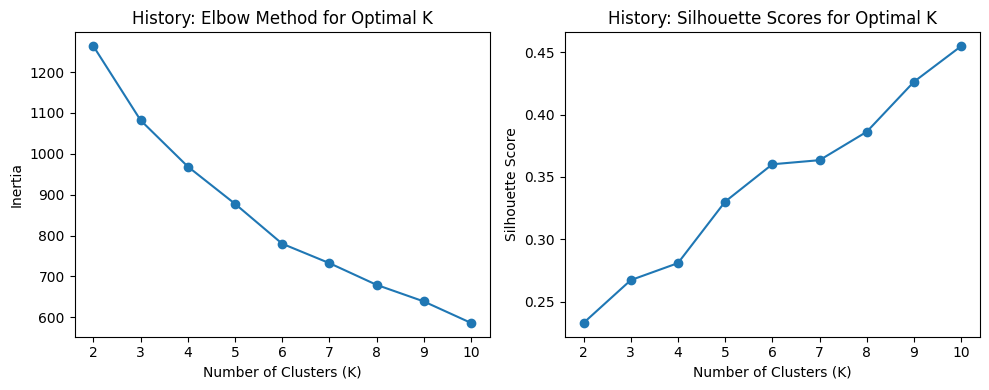


--- Analysis of History Clusters (4 clusters) ---
                P_PSY_HX P_MED_HX FAM_P_HX P_SOC_HX P_SEX_HX FOR_HX PREMOBD_HX
History_Cluster                                                               
0                     NO       NO       NO      YES   NORMAL     NO     NORMAL
1                    YES       NO       NO       NO   NORMAL     NO     NORMAL
2                     NO       NO       NO       NO   NORMAL     NO     NORMAL
3                    YES      YES      YES       NO   NORMAL     NO     NORMAL


In [ ]:
# --- Process and Cluster History Data ---
print("\n--- Processing and Clustering History Data ---")
history_processed, history_feature_names, history_indices = preprocess_for_clustering(data_cleaned_dropped, history_cols)


# Determine optimal number of clusters for History using the Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(history_processed)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(history_processed, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"History: K={k}, Silhouette Score={score:.4f}")


# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('History: Elbow Method for Optimal K')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('History: Silhouette Scores for Optimal K')
plt.tight_layout()
plt.show()



optimal_k_history = 4

kmeans_history = KMeans(n_clusters=optimal_k_history, random_state=42, n_init=10) # Add n_init
history_clusters = kmeans_history.fit_predict(history_processed)

# Add cluster labels back to the original data_cleaned_dropped DataFrame
data_cleaned_dropped['History_Cluster'] = pd.Series(history_clusters, index=history_indices)

print(f"\n--- Analysis of History Clusters ({optimal_k_history} clusters) ---")
history_analysis = data_cleaned_dropped.groupby('History_Cluster')[history_cols].agg(lambda x: x.mode()[0] if x.dtype == 'object' else x.median())
print(history_analysis)

### Cluster Stability Analysis

Mental State - Seed=10 | ARI=0.9949, NMI=0.9919
Mental State - Seed=11 | ARI=0.9949, NMI=0.9919
Mental State - Seed=12 | ARI=0.9899, NMI=0.9855
Mental State - Seed=13 | ARI=0.9949, NMI=0.9919
Mental State - Seed=14 | ARI=0.9949, NMI=0.9919
Mental State - Seed=15 | ARI=0.9949, NMI=0.9919
Mental State - Seed=16 | ARI=0.9949, NMI=0.9919
Mental State - Seed=17 | ARI=0.9949, NMI=0.9919
Mental State - Seed=18 | ARI=0.9949, NMI=0.9919
Mental State - Seed=19 | ARI=0.9949, NMI=0.9919

--- Mental State Cluster Stability Summary ---
Mean ARI: 0.9944 ± 0.0015
Mean NMI: 0.9912 ± 0.0019


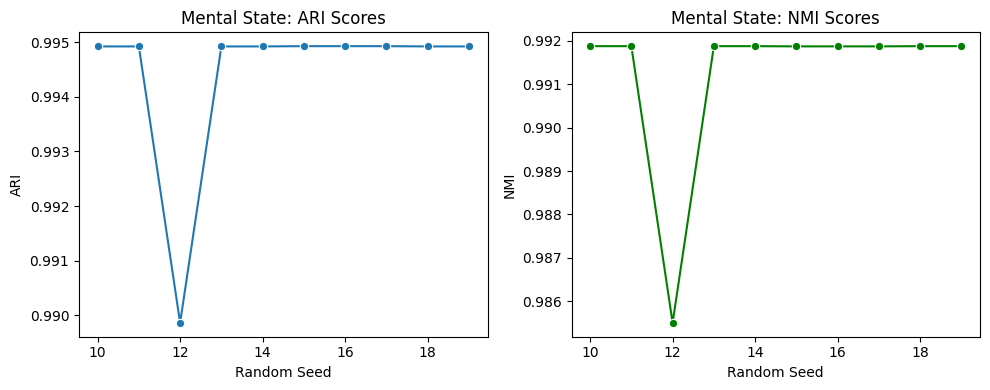

In [ ]:
# Evaluate clustering stability for Mental State Clusters

# Re-preprocess mental state features
mental_state_processed, mental_feature_names, mental_indices = preprocess_for_clustering(
    data_cleaned_dropped, mental_state_cols
)

# Extract true labels
true_labels_mental = data_cleaned_dropped.loc[mental_indices, 'Mental_State_Cluster'].values

# Define evaluation function (already defined previously)
def evaluate_stability(X, true_labels, domain_name, n_clusters=4, n_runs=10):
    from sklearn.cluster import KMeans
    from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    ari_scores = []
    nmi_scores = []
    seeds = range(10, 10 + n_runs)

    for seed in seeds:
        km = KMeans(n_clusters=n_clusters, random_state=seed, n_init=10)
        new_labels = km.fit_predict(X)

        ari = adjusted_rand_score(true_labels, new_labels)
        nmi = normalized_mutual_info_score(true_labels, new_labels)

        ari_scores.append(ari)
        nmi_scores.append(nmi)

        print(f"{domain_name} - Seed={seed} | ARI={ari:.4f}, NMI={nmi:.4f}")

    print(f"\n--- {domain_name} Cluster Stability Summary ---")
    print(f"Mean ARI: {np.mean(ari_scores):.4f} ± {np.std(ari_scores):.4f}")
    print(f"Mean NMI: {np.mean(nmi_scores):.4f} ± {np.std(nmi_scores):.4f}")

    # Plot stability metrics
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.lineplot(x=list(seeds), y=ari_scores, marker='o')
    plt.title(f'{domain_name}: ARI Scores')
    plt.xlabel('Random Seed')
    plt.ylabel('ARI')

    plt.subplot(1, 2, 2)
    sns.lineplot(x=list(seeds), y=nmi_scores, marker='o', color='green')
    plt.title(f'{domain_name}: NMI Scores')
    plt.xlabel('Random Seed')
    plt.ylabel('NMI')

    plt.tight_layout()
    plt.show()

# Run for Mental State
evaluate_stability(mental_state_processed, true_labels_mental, domain_name="Mental State")

History - Seed=10 | ARI=0.8918, NMI=0.8872
History - Seed=11 | ARI=0.4911, NMI=0.5735
History - Seed=12 | ARI=0.3763, NMI=0.5126
History - Seed=13 | ARI=0.3844, NMI=0.4720
History - Seed=14 | ARI=0.3601, NMI=0.4305
History - Seed=15 | ARI=0.5425, NMI=0.6364
History - Seed=16 | ARI=0.3491, NMI=0.4955
History - Seed=17 | ARI=0.3717, NMI=0.5332
History - Seed=18 | ARI=0.3615, NMI=0.5088
History - Seed=19 | ARI=0.3614, NMI=0.4155

--- History Cluster Stability Summary ---
Mean ARI: 0.4490 ± 0.1598
Mean NMI: 0.5465 ± 0.1290


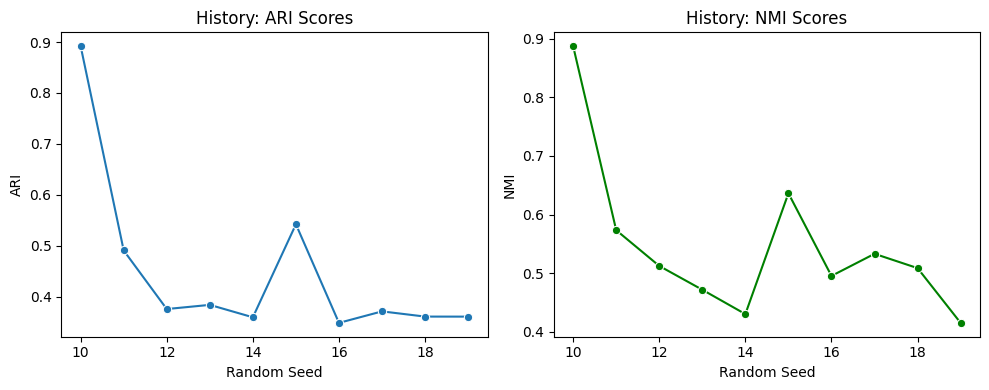

In [ ]:
# Evaluate clustering stability for History Clusters

true_labels_history = data_cleaned_dropped.loc[history_processed.shape[0]*[True], 'History_Cluster'].values

evaluate_stability(history_processed, true_labels_history, domain_name="History")

### UMAP Visualization

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


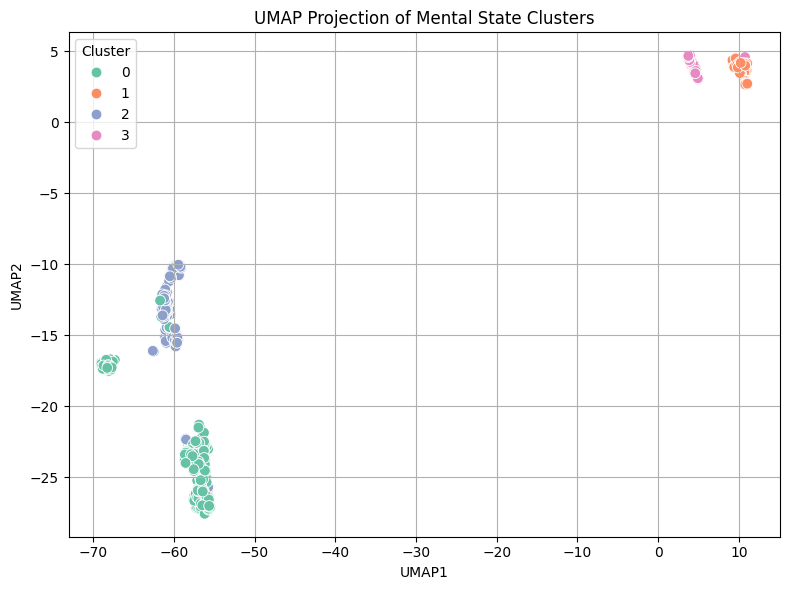

In [ ]:
# Run UMAP on Mental State
umap_model_mental = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
mental_state_embedding = umap_model_mental.fit_transform(mental_state_processed)

# Create DataFrame for plotting
umap_df_mental = pd.DataFrame({
    'UMAP1': mental_state_embedding[:, 0],
    'UMAP2': mental_state_embedding[:, 1],
    'Cluster': data_cleaned_dropped.loc[mental_indices, 'Mental_State_Cluster'].values
})

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df_mental, x='UMAP1', y='UMAP2', hue='Cluster', palette='Set2', s=60)
plt.title('UMAP Projection of Mental State Clusters')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


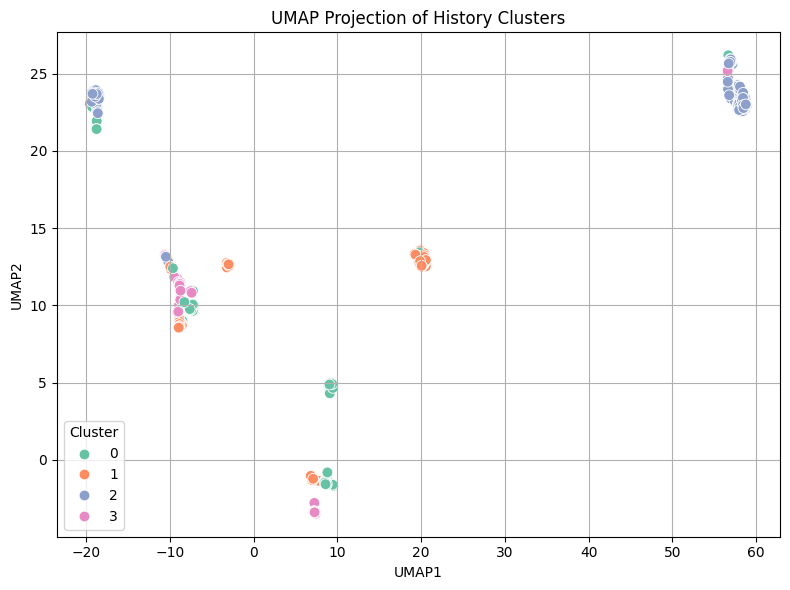

In [ ]:
# Run UMAP on History
umap_model_history = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
history_embedding = umap_model_history.fit_transform(history_processed)

# Create DataFrame for plotting
umap_df_history = pd.DataFrame({
    'UMAP1': history_embedding[:, 0],
    'UMAP2': history_embedding[:, 1],
    'Cluster': data_cleaned_dropped.loc[history_indices, 'History_Cluster'].values
})

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=umap_df_history, x='UMAP1', y='UMAP2', hue='Cluster', palette='Set2', s=60)
plt.title('UMAP Projection of History Clusters')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

### Cluster Correlation


--- Exploring Relationships Between Cluster Types ---
Crosstab of Mental State Clusters vs History Clusters:
History_Cluster        0   1    2   3
Mental_State_Cluster                 
0                     60  99  129  39
1                      4  24   61  10
2                     43  47   70  18
3                     20  12   14  14


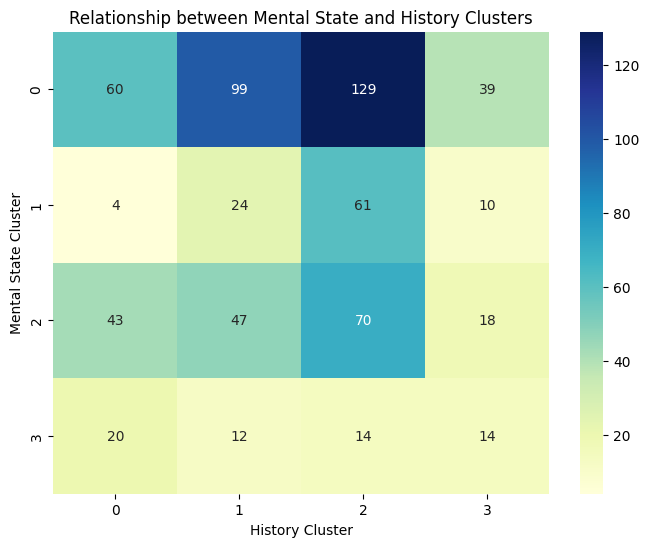


--- Relationship of Mental State Cluster with Diagnosis (DIAGN) ---
DIAGN                 ACUTE PSYCHOSIS  ALZHEIMERS  ANAEMIA  ANXIETY DISORDER  \
Mental_State_Cluster                                                           
0                                   5           1        0                 0   
1                                   1           0        0                 0   
2                                   3           0        3                 3   
3                                   0           0        0                 0   

DIAGN                 AUTISM  BEHAVIOURAL DISORDER  \
Mental_State_Cluster                                 
0                          3                     3   
1                          0                     0   
2                          0                     0   
3                          0                     0   

DIAGN                 BIPOLAR AFFECTION DISORDER  BIPOLAR DISORDER  BPD  \
Mental_State_Cluster                              

DIAGN,ACUTE PSYCHOSIS,ALZHEIMERS,ANAEMIA,ANXIETY DISORDER,AUTISM,BEHAVIOURAL DISORDER,BIPOLAR AFFECTION DISORDER,BIPOLAR DISORDER,BPD,CATATONIC SCHIZ,...,SCHIZOAFFECTIVE DISORDER,SCHIZOPHRENIA WITH NEGATIVE SYMPTOMS,SCHIZOTYPAL PERSONALITY DISORDER,SEIZURE DISORDER,SIEZURE,SIMPLE SCHIZ,SIMPLE SCHIZOPHRENIA,SUBSTANCE USE,UNDIFFERENTIATED SCHIZOPHRENIA,VASCULAR DISFUNCTION
History_Cluster,,,,,,,,,,,,,,,,,,,,,
0,3,0,0,3,3,0,2,0,0,0,...,0,0,0,1,1,0,2,7,0,0
1,2,0,0,0,0,3,5,0,0,1,...,2,0,0,2,1,1,6,1,0,0
2,3,1,3,0,0,0,4,1,1,1,...,5,1,3,1,0,0,7,1,4,3
3,1,0,0,0,0,0,6,0,0,0,...,1,0,0,0,1,0,4,1,0,0


In [ ]:
print("\n--- Exploring Relationships Between Cluster Types ---")
ct_clusters = pd.crosstab(data_cleaned_dropped['Mental_State_Cluster'], data_cleaned_dropped['History_Cluster'])
print("Crosstab of Mental State Clusters vs History Clusters:")
print(ct_clusters)

plt.figure(figsize=(8, 6))
sns.heatmap(ct_clusters, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Relationship between Mental State and History Clusters')
plt.xlabel('History Cluster')
plt.ylabel('Mental State Cluster')
plt.show()

# Example: Relationship of Mental State Cluster with Diagnosis
print("\n--- Relationship of Mental State Cluster with Diagnosis (DIAGN) ---")
ct_mental_diagn = pd.crosstab(data_cleaned_dropped['Mental_State_Cluster'], data_cleaned_dropped['DIAGN'])
print(ct_mental_diagn)

# Example: Relationship of History Cluster with Diagnosis
print("\n--- Relationship of History Cluster with Diagnosis (DIAGN) ---")
ct_history_diagn = pd.crosstab(data_cleaned_dropped['History_Cluster'], data_cleaned_dropped['DIAGN'])
ct_history_diagn

In [ ]:
from scipy.stats import chi2_contingency

# --- 1. Mental State Cluster vs Diagnosis ---
ct_mental_diagn = pd.crosstab(data_cleaned_dropped['Mental_State_Cluster'], data_cleaned_dropped['DIAGN'])
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(ct_mental_diagn)
print("Mental State Cluster vs Diagnosis")
print(f"Chi-square statistic: {chi2_1:.4f}, p-value: {p_1:.4f}, degrees of freedom: {dof_1}")
print("Significant" if p_1 < 0.05 else "Not significant")

# --- 2. History Cluster vs Diagnosis ---
ct_history_diagn = pd.crosstab(data_cleaned_dropped['History_Cluster'], data_cleaned_dropped['DIAGN'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(ct_history_diagn)
print("\nHistory Cluster vs Diagnosis")
print(f"Chi-square statistic: {chi2_2:.4f}, p-value: {p_2:.4f}, degrees of freedom: {dof_2}")
print("Significant" if p_2 < 0.05 else "Not significant")

# --- 3. Mental State Cluster vs History Cluster ---
ct_mental_history = pd.crosstab(data_cleaned_dropped['Mental_State_Cluster'], data_cleaned_dropped['History_Cluster'])
chi2_3, p_3, dof_3, expected_3 = chi2_contingency(ct_mental_history)
print("\nMental State Cluster vs History Cluster")
print(f"Chi-square statistic: {chi2_3:.4f}, p-value: {p_3:.4f}, degrees of freedom: {dof_3}")
print("Significant" if p_3 < 0.05 else "Not significant")

Mental State Cluster vs Diagnosis
Chi-square statistic: 420.0302, p-value: 0.0000, degrees of freedom: 144
Significant

History Cluster vs Diagnosis
Chi-square statistic: 278.7549, p-value: 0.0000, degrees of freedom: 144
Significant

Mental State Cluster vs History Cluster
Chi-square statistic: 45.3252, p-value: 0.0000, degrees of freedom: 9
Significant
